In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import dirichlet

# Import GlycoForge functions
from glycoforge.utils import clr, invclr

# Reload the module to get updated function
import importlib
import glycoforge.sim_bio_factor
importlib.reload(glycoforge.sim_bio_factor)
from glycoforge.sim_bio_factor import robust_effect_size_processing

from glycowork.motif.analysis import get_differential_expression

print("✓ Imports successful (with module reload)")

✓ Imports successful (with module reload)


## Step 1: Load Both Datasets

In [2]:
# Load O-glycan data
o_data = pd.read_csv('data/glycomics_human_leukemia_O_PMID34646384.csv', index_col=0)
o_healthy_cols = [col for col in o_data.columns if 'R7' in col]
o_unhealthy_cols = [col for col in o_data.columns if 'BM' in col]

print("📊 O-GLYCAN Dataset:")
print(f"  Shape: {o_data.shape} (features × samples)")
print(f"  Healthy samples (R7): {len(o_healthy_cols)}")
print(f"  Unhealthy samples (BM): {len(o_unhealthy_cols)}")
print(f"  Sample names: {o_data.columns.tolist()[:5]}...")

# Load N-glycan data
n_data = pd.read_csv('data/glycomics_human_leukemia_N_PMID34646384.csv', index_col=0)
n_healthy_cols = [col for col in n_data.columns if 'R7' in col]
n_unhealthy_cols = [col for col in n_data.columns if 'BM' in col]

print("\n📊 N-GLYCAN Dataset:")
print(f"  Shape: {n_data.shape} (features × samples)")
print(f"  Healthy samples (R7): {len(n_healthy_cols)}")
print(f"  Unhealthy samples (BM): {len(n_unhealthy_cols)}")
print(f"  Sample names: {n_data.columns.tolist()}")

📊 O-GLYCAN Dataset:
  Shape: (21, 20) (features × samples)
  Healthy samples (R7): 12
  Unhealthy samples (BM): 8
  Sample names: ['BM0_1', 'BM0_2', 'BM0_3', 'BM0_4', 'BM37_1']...

📊 N-GLYCAN Dataset:
  Shape: (98, 7) (features × samples)
  Healthy samples (R7): 4
  Unhealthy samples (BM): 3
  Sample names: ['BM0', 'BM37', 'BM41', 'R7B1', 'R7B3', 'R7B6', 'R7B11']


## Step 2: Get Differential Expression (Cohen's d)

In [3]:
# O-glycan differential expression
# glycowork expects first column to be glycan names, not index
o_data_for_de = o_data.reset_index()
o_diffexp = get_differential_expression(
    o_data_for_de,
    group1=o_unhealthy_cols,
    group2=o_healthy_cols,
    transform="CLR",
    impute=True
)

# Use correct column name from glycowork
o_effect_sizes = o_diffexp['Effect size'].fillna(0.0).values
o_pvalues = o_diffexp['p-value'].values if 'p-value' in o_diffexp.columns else None

print("="*80)
print("O-GLYCAN: Raw Cohen's d Effect Sizes")
print("="*80)
print(f"Number of glycans: {len(o_effect_sizes)}")
print(f"\nDescriptive statistics:")
print(f"  Min:        {np.min(o_effect_sizes):.4f}")
print(f"  Max:        {np.max(o_effect_sizes):.4f}")
print(f"  Mean:       {np.mean(o_effect_sizes):.4f}")
print(f"  Median:     {np.median(o_effect_sizes):.4f}")
print(f"  Std:        {np.std(o_effect_sizes):.4f}")
print(f"\nAbsolute values:")
print(f"  Median |d|: {np.median(np.abs(o_effect_sizes)):.4f}")
print(f"  Mean |d|:   {np.mean(np.abs(o_effect_sizes)):.4f}")
print(f"\nDistribution:")
print(f"  |d| > 0.5:  {(np.abs(o_effect_sizes) > 0.5).sum()}/{len(o_effect_sizes)} ({(np.abs(o_effect_sizes) > 0.5).sum()/len(o_effect_sizes)*100:.1f}%)")
print(f"  |d| > 1.0:  {(np.abs(o_effect_sizes) > 1.0).sum()}/{len(o_effect_sizes)} ({(np.abs(o_effect_sizes) > 1.0).sum()/len(o_effect_sizes)*100:.1f}%)")
print(f"  |d| > 2.0:  {(np.abs(o_effect_sizes) > 2.0).sum()}/{len(o_effect_sizes)} ({(np.abs(o_effect_sizes) > 2.0).sum()/len(o_effect_sizes)*100:.1f}%)")
print(f"  |d| > 5.0:  {(np.abs(o_effect_sizes) > 5.0).sum()}/{len(o_effect_sizes)} ({(np.abs(o_effect_sizes) > 5.0).sum()/len(o_effect_sizes)*100:.1f}%)")
print(f"  |d| > 10.0: {(np.abs(o_effect_sizes) > 10.0).sum()}/{len(o_effect_sizes)} ({(np.abs(o_effect_sizes) > 10.0).sum()/len(o_effect_sizes)*100:.1f}%)")

# N-glycan differential expression
n_data_for_de = n_data.reset_index()
n_diffexp = get_differential_expression(
    n_data_for_de,
    group1=n_unhealthy_cols,
    group2=n_healthy_cols,
    transform="CLR",
    impute=True
)

n_effect_sizes = n_diffexp['Effect size'].fillna(0.0).values
n_pvalues = n_diffexp['p-value'].values if 'p-value' in n_diffexp.columns else None

print("\n" + "="*80)
print("N-GLYCAN: Raw Cohen's d Effect Sizes")
print("="*80)
print(f"Number of glycans: {len(n_effect_sizes)}")
print(f"\nDescriptive statistics:")
print(f"  Min:        {np.min(n_effect_sizes):.4f}")
print(f"  Max:        {np.max(n_effect_sizes):.4f}")
print(f"  Mean:       {np.mean(n_effect_sizes):.4f}")
print(f"  Median:     {np.median(n_effect_sizes):.4f}")
print(f"  Std:        {np.std(n_effect_sizes):.4f}")
print(f"\nAbsolute values:")
print(f"  Median |d|: {np.median(np.abs(n_effect_sizes)):.4f}")
print(f"  Mean |d|:   {np.mean(np.abs(n_effect_sizes)):.4f}")
print(f"\nDistribution:")
print(f"  |d| > 0.5:  {(np.abs(n_effect_sizes) > 0.5).sum()}/{len(n_effect_sizes)} ({(np.abs(n_effect_sizes) > 0.5).sum()/len(n_effect_sizes)*100:.1f}%)")
print(f"  |d| > 1.0:  {(np.abs(n_effect_sizes) > 1.0).sum()}/{len(n_effect_sizes)} ({(np.abs(n_effect_sizes) > 1.0).sum()/len(n_effect_sizes)*100:.1f}%)")
print(f"  |d| > 2.0:  {(np.abs(n_effect_sizes) > 2.0).sum()}/{len(n_effect_sizes)} ({(np.abs(n_effect_sizes) > 2.0).sum()/len(n_effect_sizes)*100:.1f}%)")
print(f"  |d| > 5.0:  {(np.abs(n_effect_sizes) > 5.0).sum()}/{len(n_effect_sizes)} ({(np.abs(n_effect_sizes) > 5.0).sum()/len(n_effect_sizes)*100:.1f}%)")
print(f"  |d| > 10.0: {(np.abs(n_effect_sizes) > 10.0).sum()}/{len(n_effect_sizes)} ({(np.abs(n_effect_sizes) > 10.0).sum()/len(n_effect_sizes)*100:.1f}%)")

You're working with an alpha of 0.054572814701647765 that has been adjusted for your sample size of 20.
Significance inflation detected. The CLR/ALR transformation possibly cannot handle this dataset. Consider running again with a higher gamma value.             Proceed with caution; for now switching to Bonferroni correction to be conservative about this.
O-GLYCAN: Raw Cohen's d Effect Sizes
Number of glycans: 21

Descriptive statistics:
  Min:        -82.7956
  Max:        54.3459
  Mean:       -2.3530
  Median:     4.5867
  Std:        28.4082

Absolute values:
  Median |d|: 6.1164
  Mean |d|:   16.4658

Distribution:
  |d| > 0.5:  20/21 (95.2%)
  |d| > 1.0:  20/21 (95.2%)
  |d| > 2.0:  20/21 (95.2%)
  |d| > 5.0:  13/21 (61.9%)
  |d| > 10.0: 5/21 (23.8%)
You're working with an alpha of 0.07499419679154773 that has been adjusted for your sample size of 7.
You're working with an alpha of 0.07499419679154773 that has been adjusted for your sample size of 7.

N-GLYCAN: Raw Cohen's d Eff

## Step 3: Test New robust_effect_size_processing

Test the refactored function with Winsorization and baseline scaling.

In [4]:

# Simulation parameters
bio_strength = 1.5
k_dir = 80
n_H = 50  # Number of healthy samples
n_U = 50  # Number of unhealthy samples
n_batches = 3
seed = 42  # Use single seed for this notebook


In [7]:
# Test new robust_effect_size_processing
print("="*80)
print("NEW APPROACH: Winsorization + Baseline Scaling")
print("="*80)
print(f"Parameters: bio_strength={bio_strength}, baseline_method='median', winsorize=True (auto)")
print()

# Process O-glycan with new approach
print("\n" + "="*80)
print("O-GLYCAN Processing (New)")
print("="*80)
o_d_robust_new = robust_effect_size_processing(
    o_effect_sizes,
    winsorize_percentile=None,  # Auto-select
    baseline_method="median",
    verbose=True
)

# Calculate final injection
o_injection_new = o_d_robust_new * bio_strength
print(f"\n✓ Final injection: median|·|={np.median(np.abs(o_injection_new)):.4f}, max|·|={np.max(np.abs(o_injection_new)):.4f}")

# Process N-glycan with new approach
print("\n" + "="*80)
print("N-GLYCAN Processing (New)")
print("="*80)
n_d_robust_new = robust_effect_size_processing(
    n_effect_sizes,
    winsorize_percentile=None,  # Auto-select
    baseline_method="median",
    verbose=True
)

# Calculate final injection
n_injection_new = n_d_robust_new * bio_strength
print(f"\n✓ Final injection: median|·|={np.median(np.abs(n_injection_new)):.4f}, max|·|={np.max(np.abs(n_injection_new)):.4f}")

print("\n" + "="*80)
print("✅ NEW APPROACH COMPLETE")
print("="*80)
print(f"\nResults:")
print(f"  O-glycan: median injection = {np.median(np.abs(o_injection_new)):.4f} CLR units")
print(f"  N-glycan: median injection = {np.median(np.abs(n_injection_new)):.4f} CLR units")
print(f"  Both datasets now have EQUAL injection strength = bio_strength")
print("="*80)

NEW APPROACH: Winsorization + Baseline Scaling
Parameters: bio_strength=1.5, baseline_method='median', winsorize=True (auto)


O-GLYCAN Processing (New)
  [Input] range=[-82.796, 54.346], mean=-2.353, median|·|=6.116
  [Winsorize] Auto-selected 95th percentile (outlier_ratio=7.21)
  [Winsorize] Clipped 2/21 values (9.5%)
  [Winsorize] Before: median|·|=8.469, max|·|=80.443
  [Winsorize] After:  median|·|=8.469, max|·|=56.024
  [Baseline] method=median, value=8.469
  [Normalized] median|·|=1.000, max|·|=6.615

✓ Final injection: median|·|=1.5000, max|·|=9.9224

N-GLYCAN Processing (New)
  [Input] range=[-168.477, 24.358], mean=-2.306, median|·|=3.262
  [Winsorize] Auto-selected 85th percentile (outlier_ratio=20.67)
  [Winsorize] Clipped 22/71 values (31.0%)
  [Winsorize] Before: median|·|=5.530, max|·|=166.171
  [Winsorize] After:  median|·|=4.802, max|·|=8.638
  [Baseline] method=median, value=4.802
  [Normalized] median|·|=1.000, max|·|=1.799

✓ Final injection: median|·|=1.5000, max|

## Step 4: Define check_bio_signal Function

Unified biological signal assessment for both real and simulated data.

In [8]:
from scipy.stats import f_oneway, shapiro, kruskal

def check_bio_signal(data_clr, bio_labels, stage_name="", verbose=True):
    """
    Unified biological signal assessment for both real and simulated data.
    
    Parameters:
    -----------
    data_clr : pd.DataFrame or np.ndarray
        CLR-transformed data (features × samples)
    bio_labels : array-like
        Binary labels (0=healthy, 1=unhealthy)
    stage_name : str
        Description for printing (e.g., "O-glycan Real Data")
    verbose : bool
        Print diagnostic information
    
    Returns:
    --------
    results : dict
        Diagnostic metrics including eta², F-stat, p-value, strength assessment
    pc : np.ndarray
        PCA-transformed data for visualization
    
    References:
    -----------
    eta² thresholds based on Cohen, J. (1988). Statistical Power Analysis 
    for the Behavioral Sciences (2nd ed.). Routledge.
    - Small effect: eta² < 0.06
    - Medium effect: 0.06 ≤ eta² < 0.14
    - Large effect: eta² ≥ 0.14
    """
    # 1. PCA transformation
    X = np.asarray(data_clr).T  # Transpose to samples × features
    pca = PCA(n_components=min(5, X.shape[0]-1))
    pc = pca.fit_transform(X)
    var_explained = pca.explained_variance_ratio_[:2].sum()
    
    # 2. Choose statistical test based on sample size and normality
    bio_cat = pd.Categorical(bio_labels)
    pc1_by_bio = [pc[bio_cat==b, 0] for b in bio_cat.categories]
    total_samples = len(pc[:, 0])
    
    if total_samples < 30:
        # Small sample: use non-parametric test
        f_stat, p_val = kruskal(*pc1_by_bio)
        test_used = "Kruskal-Wallis"
    else:
        # Large sample: check normality first
        _, norm_p = shapiro(pc[:, 0])
        if norm_p < 0.05:
            # Non-normal: use Kruskal-Wallis
            f_stat, p_val = kruskal(*pc1_by_bio)
            test_used = "Kruskal-Wallis"
        else:
            # Normal: use ANOVA
            f_stat, p_val = f_oneway(*pc1_by_bio)
            test_used = "ANOVA"
    
    # 3. Calculate eta² (effect size)
    if test_used == "ANOVA":
        # Standard eta² calculation for ANOVA
        ss_total = np.var(pc[:, 0]) * (len(pc[:, 0]) - 1)
        ss_between = sum([len(group) * (np.mean(group) - np.mean(pc[:, 0]))**2 
                         for group in pc1_by_bio])
        bio_eta = ss_between / ss_total if ss_total > 0 else 0
    else:
        # Approximate eta² from Kruskal-Wallis H-statistic
        bio_eta = (f_stat - len(bio_cat.categories) + 1) / (total_samples - len(bio_cat.categories) + 1)
        bio_eta = max(0, min(1, bio_eta))
    
    # 4. Assess signal strength (Cohen's standards)
    if p_val >= 0.05:
        strength = "ABSENT"
        strength_desc = f"No significant signal (p={p_val:.3e} ≥ 0.05)"
    elif bio_eta < 0.06:
        strength = "WEAK"
        strength_desc = f"Small effect (eta²={bio_eta:.1%} < 6%)"
    elif bio_eta < 0.14:
        strength = "MODERATE"
        strength_desc = f"Medium effect (6% ≤ eta²={bio_eta:.1%} < 14%)"
    else:
        strength = "STRONG"
        strength_desc = f"Large effect (eta²={bio_eta:.1%} ≥ 14%)"
    
    # 5. Calculate centroid distance in PC space
    centroids = [pc[bio_cat==b, :2].mean(axis=0) for b in bio_cat.categories]
    centroid_dist = np.linalg.norm(centroids[0] - centroids[1]) if len(centroids) == 2 else 0
    
    # 6. Verbose output
    if verbose:
        print(f"\n{'='*60}")
        print(f"  {stage_name} - Bio Signal Assessment")
        print(f"{'='*60}")
        print(f"  PC1-2 explain {var_explained:.1%} variance")
        print(f"  Bio effect on PC1: F={f_stat:.2f}, p={p_val:.3e} ({test_used})")
        print(f"  Bio effect size (eta²): {bio_eta:.1%}")
        print(f"  Centroid distance (PC1-2): {centroid_dist:.2f}")
        print(f"  Signal strength: {strength}")
        print(f"  → {strength_desc}")
        print(f"{'='*60}")
    
    # 7. Return structured results
    return {
        'pca_variance_explained': float(var_explained),
        'bio_effect': {
            'f_statistic': float(f_stat),
            'p_value': float(p_val),
            'test_used': test_used,
            'effect_size_eta2': float(bio_eta)
        },
        'centroid_distance': float(centroid_dist),
        'strength': strength,
        'strength_description': strength_desc
    }, pc

print("✓ check_bio_signal function defined")

✓ check_bio_signal function defined


## Step 5: Diagnose Real Data Signal

In [9]:
import numpy as np
# Prepare bio labels (0=healthy, 1=unhealthy)
o_bio_labels = np.array([0] * len(o_healthy_cols) + [1] * len(o_unhealthy_cols))
n_bio_labels = np.array([0] * len(n_healthy_cols) + [1] * len(n_unhealthy_cols))

# Transform real data to CLR space
o_data_clr = clr(o_data.values)
n_data_clr = clr(n_data.values)

# Convert to DataFrames for consistency
o_data_clr_df = pd.DataFrame(o_data_clr, index=o_data.index, columns=o_data.columns)
n_data_clr_df = pd.DataFrame(n_data_clr, index=n_data.index, columns=n_data.columns)

print("📊 Real Data Prepared:")
print(f"  O-glycan CLR shape: {o_data_clr_df.shape}")
print(f"  N-glycan CLR shape: {n_data_clr_df.shape}")
print(f"  Bio labels (O): {o_bio_labels}")
print(f"  Bio labels (N): {n_bio_labels}")

📊 Real Data Prepared:
  O-glycan CLR shape: (21, 20)
  N-glycan CLR shape: (98, 7)
  Bio labels (O): [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
  Bio labels (N): [0 0 0 0 1 1 1]


In [10]:
# Diagnose O-glycan real data
o_real_results, o_real_pc = check_bio_signal(
    data_clr=o_data_clr_df,
    bio_labels=o_bio_labels,
    stage_name="O-glycan Real Data",
    verbose=True
)


  O-glycan Real Data - Bio Signal Assessment
  PC1-2 explain 83.1% variance
  Bio effect on PC1: F=13.71, p=2.128e-04 (Kruskal-Wallis)
  Bio effect size (eta²): 66.9%
  Centroid distance (PC1-2): 22.39
  Signal strength: STRONG
  → Large effect (eta²=66.9% ≥ 14%)


In [11]:
# Diagnose N-glycan real data
n_real_results, n_real_pc = check_bio_signal(
    data_clr=n_data_clr_df,
    bio_labels=n_bio_labels,
    stage_name="N-glycan Real Data",
    verbose=True
)


  N-glycan Real Data - Bio Signal Assessment
  PC1-2 explain 59.2% variance
  Bio effect on PC1: F=1.12, p=2.888e-01 (Kruskal-Wallis)
  Bio effect size (eta²): 2.1%
  Centroid distance (PC1-2): 30.49
  Signal strength: ABSENT
  → No significant signal (p=2.888e-01 ≥ 0.05)


In [12]:
# Compare real signal strengths
print("\n" + "="*60)
print("STAGE 1 SUMMARY: Real Data Comparison")
print("="*60)

print(f"\n📊 O-glycan:")
print(f"   eta² = {o_real_results['bio_effect']['effect_size_eta2']:.1%}")
print(f"   Strength: {o_real_results['strength']}")
print(f"   Centroid distance: {o_real_results['centroid_distance']:.2f}")

print(f"\n📊 N-glycan:")
print(f"   eta² = {n_real_results['bio_effect']['effect_size_eta2']:.1%}")
print(f"   Strength: {n_real_results['strength']}")
print(f"   Centroid distance: {n_real_results['centroid_distance']:.2f}")

print("\n💡 Interpretation:")
if o_real_results['bio_effect']['effect_size_eta2'] < 0.06:
    print("   O-glycan has WEAK real signal → Recommend aggressive Winsorization (90th percentile)")
elif o_real_results['bio_effect']['effect_size_eta2'] < 0.14:
    print("   O-glycan has MODERATE real signal → Recommend moderate Winsorization (95th percentile)")
else:
    print("   O-glycan has STRONG real signal → Standard scaling is sufficient")

if n_real_results['bio_effect']['effect_size_eta2'] < 0.06:
    print("   N-glycan has WEAK real signal → Recommend aggressive Winsorization (90th percentile)")
elif n_real_results['bio_effect']['effect_size_eta2'] < 0.14:
    print("   N-glycan has MODERATE real signal → Recommend moderate Winsorization (95th percentile)")
else:
    print("   N-glycan has STRONG real signal → Standard scaling is sufficient")
print("="*60)


STAGE 1 SUMMARY: Real Data Comparison

📊 O-glycan:
   eta² = 66.9%
   Strength: STRONG
   Centroid distance: 22.39

📊 N-glycan:
   eta² = 2.1%
   Strength: ABSENT
   Centroid distance: 30.49

💡 Interpretation:
   O-glycan has STRONG real signal → Standard scaling is sufficient
   N-glycan has WEAK real signal → Recommend aggressive Winsorization (90th percentile)


## Step 6: Generate Simulated Data

In [13]:
from glycoforge.pipeline import simulate
import os

# Output directories
o_output_dir = '/tmp/glycoforge_o_glycan'
n_output_dir = '/tmp/glycoforge_n_glycan'

print(f"🔧 Simulation Parameters:")
print(f"   bio_strength = {bio_strength}")
print(f"   k_dir = {k_dir}")
print(f"   n_H (healthy) = {n_H}")
print(f"   n_U (unhealthy) = {n_U}")
print(f"   n_batches = {n_batches}")
print(f"   seed = {seed}")
print(f"\n📁 Output directories:")
print(f"   O-glycan: {o_output_dir}")
print(f"   N-glycan: {n_output_dir}")

🔧 Simulation Parameters:
   bio_strength = 1.5
   k_dir = 80
   n_H (healthy) = 50
   n_U (unhealthy) = 50
   n_batches = 3
   seed = 42

📁 Output directories:
   O-glycan: /tmp/glycoforge_o_glycan
   N-glycan: /tmp/glycoforge_n_glycan



🔄 Simulating O-glycan data with NEW approach...
UNIFIED BATCH CORRECTION PIPELINE
Mode: REAL
Data file: data/glycomics_human_leukemia_O_PMID34646384.csv
Use real effect sizes: True
Processing 1 random seeds
Parameters: n_glycans=50, n_H=50, n_U=50
Bio signal: bio_strength=1.5, k_dir=80, variance_ratio=1.5
  → Healthy k_dir=80.0, Unhealthy k_dir=53.3
Batch: n_batches=3, kappa_mu=1.0, var_b=0.5
Output: /tmp/glycoforge_o_glycan
[Real Data] Applied jitter to zero values to prevent zero-variance issues
You're working with an alpha of 0.054572814701647765 that has been adjusted for your sample size of 20.
Significance inflation detected. The CLR/ALR transformation possibly cannot handle this dataset. Consider running again with a higher gamma value.             Proceed with caution; for now switching to Bonferroni correction to be conservative about this.
[Real Data] Found 3 zeros in healthy mean
[Mask] Mode: Significant (15 features)
[Real Data] 15/21 glycans will have effects injected
[de

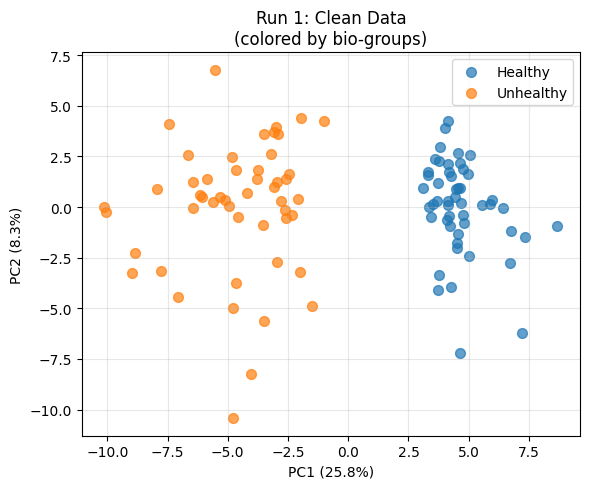

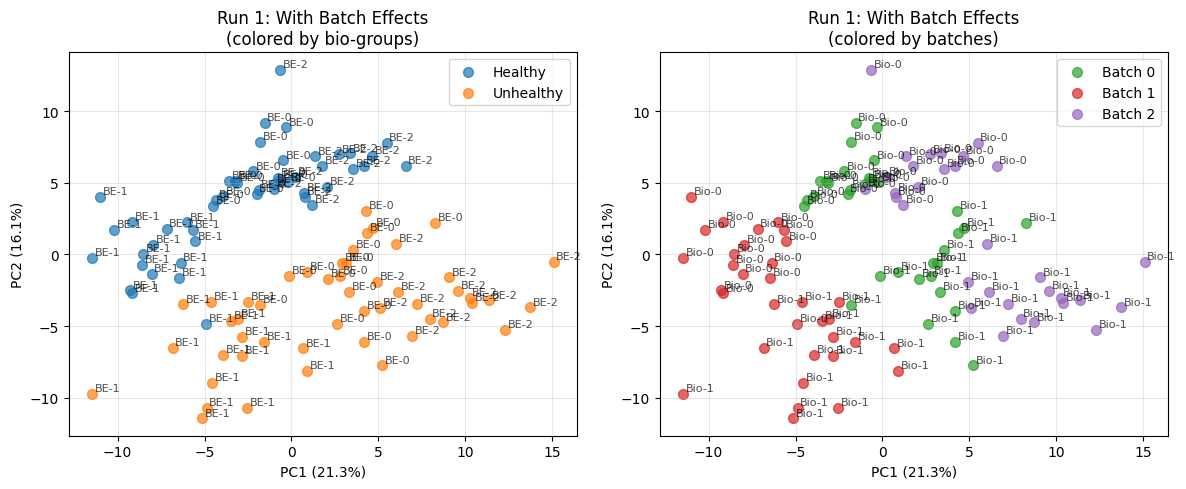

Metadata saved: /tmp/glycoforge_o_glycan/metadata_seed42.json
PIPELINE COMPLETED
Processed 1 seeds successfully
Results in: /tmp/glycoforge_o_glycan

✓ O-glycan Y_clean shape: (21, 100)
✓ Loaded from: /tmp/glycoforge_o_glycan/1_Y_clean_seed42.csv


In [26]:
# Reload pipeline module to get updated function
import glycoforge.pipeline
importlib.reload(glycoforge.pipeline)
from glycoforge.pipeline import simulate

# Simulate O-glycan data with verbose to see injection details
print("\n🔄 Simulating O-glycan data with NEW approach...")
o_sim_results = simulate(
    data_source="real",
    data_file='data/glycomics_human_leukemia_O_PMID34646384.csv',
    column_prefix={'healthy': 'R7', 'unhealthy': 'BM'},
    n_H=n_H,
    n_U=n_U,
    n_batches=n_batches,
    bio_strength=bio_strength,
    k_dir=k_dir,
    use_real_effect_sizes=True,
    differential_mask="significant",  # 🔧 FIX: Use p-value-based mask from get_differential_expression
    winsorize_percentile=None,  # Auto
    baseline_method="median",
    random_seeds=[seed],
    output_dir=o_output_dir,
    save_csv=True,
    verbose=True  # Enable verbose to see processing details
)

# Load Y_clean from saved CSV
o_Y_clean = pd.read_csv(f'{o_output_dir}/1_Y_clean_seed{seed}.csv', index_col=0)
print(f"\n✓ O-glycan Y_clean shape: {o_Y_clean.shape}")
print(f"✓ Loaded from: {o_output_dir}/1_Y_clean_seed{seed}.csv")


🔄 Simulating N-glycan data...
UNIFIED BATCH CORRECTION PIPELINE
Mode: REAL
Data file: data/glycomics_human_leukemia_N_PMID34646384.csv
Use real effect sizes: True
Processing 1 random seeds
Parameters: n_glycans=50, n_H=50, n_U=50
Bio signal: bio_strength=1.5, k_dir=80, variance_ratio=1.5
  → Healthy k_dir=80.0, Unhealthy k_dir=53.3
Batch: n_batches=3, kappa_mu=1.0, var_b=0.5
Output: /tmp/glycoforge_n_glycan
[Real Data] Applied jitter to zero values to prevent zero-variance issues
You're working with an alpha of 0.07499419679154773 that has been adjusted for your sample size of 7.
[Real Data] Warning: get_differential_expression returned 76 rows, expected 98
[Real Data] Aligning effect sizes using index mapping, filling missing with 0.0
[Real Data] Found 11 zeros in healthy mean
[Mask] Mode: Significant (3 features)
[Real Data] 3/98 glycans will have effects injected
[define_dirichlet_params_from_real_data] Imputed 11 zero values in p_h
  [Input] range=[-10.211, 18.857], mean=-0.139, m

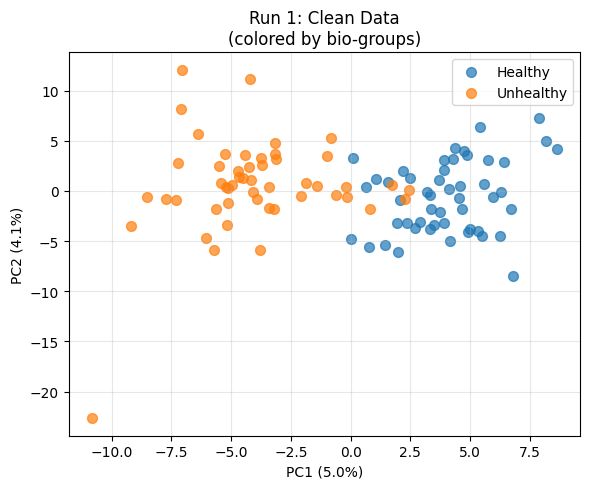

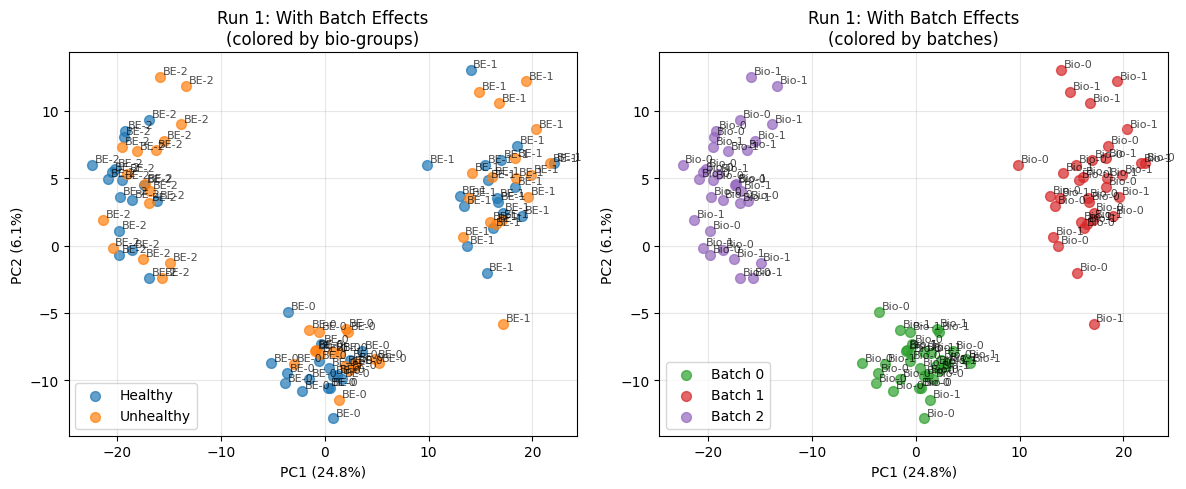

Metadata saved: /tmp/glycoforge_n_glycan/metadata_seed42.json
PIPELINE COMPLETED
Processed 1 seeds successfully
Results in: /tmp/glycoforge_n_glycan
✓ N-glycan Y_clean shape: (98, 100)
✓ Loaded from: /tmp/glycoforge_n_glycan/1_Y_clean_seed42.csv


In [16]:
# Simulate N-glycan data
print("\n🔄 Simulating N-glycan data...")
n_sim_results = simulate(
    data_source="real",
    data_file='data/glycomics_human_leukemia_N_PMID34646384.csv',
    column_prefix={'healthy': 'R7', 'unhealthy': 'BM'},
    n_H=n_H,
    n_U=n_U,
    n_batches=n_batches,
    bio_strength=bio_strength,
    k_dir=k_dir,
    use_real_effect_sizes=True,
    differential_mask="significant",  # 🔧 FIX: Use p-value-based mask
    winsorize_percentile=None,  # Auto
    baseline_method="median",
    random_seeds=[seed],
    output_dir=n_output_dir,
    save_csv=True,
    verbose=True
)

# Load Y_clean from saved CSV
n_Y_clean = pd.read_csv(f'{n_output_dir}/1_Y_clean_seed{seed}.csv', index_col=0)
print(f"✓ N-glycan Y_clean shape: {n_Y_clean.shape}")
print(f"✓ Loaded from: {n_output_dir}/1_Y_clean_seed{seed}.csv")

## Step 7: Diagnose Simulated Data Signal

In [ ]:
# Transform Y_clean to CLR space for check_bio_signal
o_Y_clean_clr = clr(o_Y_clean.values)
n_Y_clean_clr = clr(n_Y_clean.values)

# Convert to DataFrames
o_Y_clean_clr_df = pd.DataFrame(o_Y_clean_clr, index=o_Y_clean.index, columns=o_Y_clean.columns)
n_Y_clean_clr_df = pd.DataFrame(n_Y_clean_clr, index=n_Y_clean.index, columns=n_Y_clean.columns)

# Create bio labels for simulated data (first n_H = healthy, last n_U = unhealthy)
sim_bio_labels = np.array([0] * n_H + [1] * n_U)

print("📊 Simulated Data Prepared:")
print(f"  O-glycan Y_clean CLR shape: {o_Y_clean_clr_df.shape}")
print(f"  N-glycan Y_clean CLR shape: {n_Y_clean_clr_df.shape}")
print(f"  Sim bio labels: {sim_bio_labels}")

📊 Simulated Data Prepared:
  O-glycan Y_clean CLR shape: (21, 100)
  N-glycan Y_clean CLR shape: (98, 100)
  Sim bio labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
# Diagnose O-glycan simulated data
o_sim_diag_results, o_sim_pc = check_bio_signal(
    data_clr=o_Y_clean_clr_df,
    bio_labels=sim_bio_labels,
    stage_name="O-glycan Simulated Data",
    verbose=True
)


  O-glycan Simulated Data - Bio Signal Assessment
  PC1-2 explain 32.9% variance
  Bio effect on PC1: F=74.26, p=6.857e-18 (Kruskal-Wallis)
  Bio effect size (eta²): 74.0%
  Centroid distance (PC1-2): 8.43
  Signal strength: STRONG
  → Large effect (eta²=74.0% ≥ 14%)


In [ ]:
# Diagnose N-glycan simulated data
n_sim_diag_results, n_sim_pc = check_bio_signal(
    data_clr=n_Y_clean_clr_df,
    bio_labels=sim_bio_labels,
    stage_name="N-glycan Simulated Data",
    verbose=True
)


  N-glycan Simulated Data - Bio Signal Assessment
  PC1-2 explain 9.0% variance
  Bio effect on PC1: F=68.21, p=1.471e-16 (Kruskal-Wallis)
  Bio effect size (eta²): 67.9%
  Centroid distance (PC1-2): 7.86
  Signal strength: STRONG
  → Large effect (eta²=67.9% ≥ 14%)


In [ ]:
# FINAL COMPARISON: Real vs Simulated
print("\n" + "="*70)
print("FINAL COMPARISON: Real Data vs Simulated Data")
print("="*70)

print("\n📊 O-GLYCAN:")
print(f"   Real data:")
print(f"      eta² = {o_real_results['bio_effect']['effect_size_eta2']:.1%}")
print(f"      Strength: {o_real_results['strength']}")
print(f"      Centroid distance: {o_real_results['centroid_distance']:.2f}")
print(f"   Simulated data (bio_strength={bio_strength}):")
print(f"      eta² = {o_sim_diag_results['bio_effect']['effect_size_eta2']:.1%}")
print(f"      Strength: {o_sim_diag_results['strength']}")
print(f"      Centroid distance: {o_sim_diag_results['centroid_distance']:.2f}")
print(f"   Signal retention: {o_sim_diag_results['bio_effect']['effect_size_eta2'] / o_real_results['bio_effect']['effect_size_eta2']:.1%}")

print("\n📊 N-GLYCAN:")
print(f"   Real data:")
print(f"      eta² = {n_real_results['bio_effect']['effect_size_eta2']:.1%}")
print(f"      Strength: {n_real_results['strength']}")
print(f"      Centroid distance: {n_real_results['centroid_distance']:.2f}")
print(f"   Simulated data (bio_strength={bio_strength}):")
print(f"      eta² = {n_sim_diag_results['bio_effect']['effect_size_eta2']:.1%}")
print(f"      Strength: {n_sim_diag_results['strength']}")
print(f"      Centroid distance: {n_sim_diag_results['centroid_distance']:.2f}")
print(f"   Signal retention: {n_sim_diag_results['bio_effect']['effect_size_eta2'] / n_real_results['bio_effect']['effect_size_eta2']:.1%}")

print("\n💡 RECOMMENDATIONS:")
if o_sim_diag_results['strength'] in ['WEAK', 'ABSENT']:
    print(f"   ⚠️  O-glycan: Increase bio_strength from {bio_strength} to {bio_strength * 2}")
else:
    print(f"   ✓ O-glycan: Current bio_strength={bio_strength} is adequate")

if n_sim_diag_results['strength'] in ['WEAK', 'ABSENT']:
    print(f"   ⚠️  N-glycan: Increase bio_strength from {bio_strength} to {bio_strength * 2}")
else:
    print(f"   ✓ N-glycan: Current bio_strength={bio_strength} is adequate")
    
print("="*70)


FINAL COMPARISON: Real Data vs Simulated Data

📊 O-GLYCAN:
   Real data:
      eta² = 66.9%
      Strength: STRONG
      Centroid distance: 22.39
   Simulated data (bio_strength=1.5):
      eta² = 74.0%
      Strength: STRONG
      Centroid distance: 8.43
   Signal retention: 110.6%

📊 N-GLYCAN:
   Real data:
      eta² = 2.1%
      Strength: ABSENT
      Centroid distance: 30.49
   Simulated data (bio_strength=1.5):
      eta² = 67.9%
      Strength: STRONG
      Centroid distance: 7.86
   Signal retention: 3258.6%

💡 RECOMMENDATIONS:
   ✓ O-glycan: Current bio_strength=1.5 is adequate
   ✓ N-glycan: Current bio_strength=1.5 is adequate


## Step 8: Test Different k_dir Values for N-glycan

**Problem**: N-glycan signal disappears with large sample size (n=100) and low k_dir (80).

**Root cause**: 
- Original data: only 7 samples (4H + 3U)
- Simulated data: 100 samples (50H + 50U) 
- k_dir=80 → high variance per sample → signal dilution

**Solution**: Test higher k_dir values to reduce sampling variance.

In [ ]:
# Test N-glycan with different k_dir values
test_k_dirs = [80, 150, 200, 300]
n_test_results = {}

print("="*70)
print("TESTING DIFFERENT k_dir VALUES FOR N-GLYCAN")
print("="*70)
print(f"Sample size: n_H={n_H}, n_U={n_U} (total={n_H+n_U})")
print(f"Original data: 4 healthy + 3 unhealthy (total=7)")
print(f"bio_strength: {bio_strength}")
print(f"\nTesting k_dir values: {test_k_dirs}")
print("="*70)

for test_k_dir in test_k_dirs:
    print(f"\n{'='*70}")
    print(f"Testing k_dir = {test_k_dir}")
    print(f"{'='*70}")
    
    # Simulate with this k_dir
    test_output_dir = f'/tmp/glycoforge_n_test_k{test_k_dir}'
    
    test_results = simulate(
        data_source="real",
        data_file='data/glycomics_human_leukemia_N_PMID34646384.csv',
        column_prefix={'healthy': 'R7', 'unhealthy': 'BM'},
        n_H=n_H,
        n_U=n_U,
        n_batches=n_batches,
        bio_strength=bio_strength,
        k_dir=test_k_dir,
        use_real_effect_sizes=True,
        differential_mask="significant",
        winsorize=True,
        winsorize_percentile=None,
        baseline_method="median",
        random_seeds=[seed],
        output_dir=test_output_dir,
        save_csv=True,
        verbose=False  # Suppress verbose output for testing
    )
    
    # Load Y_clean
    test_Y_clean = pd.read_csv(f'{test_output_dir}/1_Y_clean_seed{seed}.csv', index_col=0)
    test_Y_clean_clr = clr(test_Y_clean.values)
    test_Y_clean_clr_df = pd.DataFrame(test_Y_clean_clr, index=test_Y_clean.index, columns=test_Y_clean.columns)
    
    # Check signal
    test_diag, test_pc = check_bio_signal(
        data_clr=test_Y_clean_clr_df,
        bio_labels=sim_bio_labels,
        stage_name=f"N-glycan k_dir={test_k_dir}",
        verbose=False
    )
    
    n_test_results[test_k_dir] = test_diag
    
    print(f"  eta² = {test_diag['bio_effect']['effect_size_eta2']:.1%}")
    print(f"  p-value = {test_diag['bio_effect']['p_value']:.3e}")
    print(f"  Strength: {test_diag['strength']}")
    print(f"  Centroid distance: {test_diag['centroid_distance']:.2f}")

print("\n" + "="*70)
print("SUMMARY: k_dir Impact on Signal Strength")
print("="*70)
print(f"{'k_dir':<10} {'eta²':<10} {'p-value':<12} {'Strength':<12} {'Distance':<10}")
print("-"*70)
for k in test_k_dirs:
    res = n_test_results[k]
    print(f"{k:<10} {res['bio_effect']['effect_size_eta2']:<10.1%} "
          f"{res['bio_effect']['p_value']:<12.3e} {res['strength']:<12} "
          f"{res['centroid_distance']:<10.2f}")

print("\n💡 RECOMMENDATION:")
best_k = max(test_k_dirs, key=lambda k: n_test_results[k]['bio_effect']['effect_size_eta2'])
best_eta = n_test_results[best_k]['bio_effect']['effect_size_eta2']
print(f"   For n_samples={n_H+n_U}, use k_dir ≥ {best_k} to achieve eta² = {best_eta:.1%}")
print(f"   Current k_dir={k_dir} gives eta² = {n_test_results[k_dir]['bio_effect']['effect_size_eta2']:.1%}")
print("="*70)